# imports and installations

In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [2]:
from scipy.io.arff import loadarff
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout, Concatenate
from tensorflow.keras import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam


from tqdm.notebook import tqdm
import time

import seaborn as sns
import matplotlib.pyplot as plt

SEED = 1994
np.random.seed(SEED)
tf.random.set_seed(SEED)

# loading data

In [3]:
data1 = loadarff('/content/MyDrive/Shareddrives/DL-HW4/diabetes.arff')
diabetes = pd.DataFrame(data1[0])

data2 = loadarff('/content/MyDrive/Shareddrives/DL-HW4/german_credit.arff')
german_credit = pd.DataFrame(data2[0])

# data visualization

In [18]:
diabetes

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,b'tested_negative'
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,b'tested_negative'
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,b'tested_negative'
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,b'tested_positive'


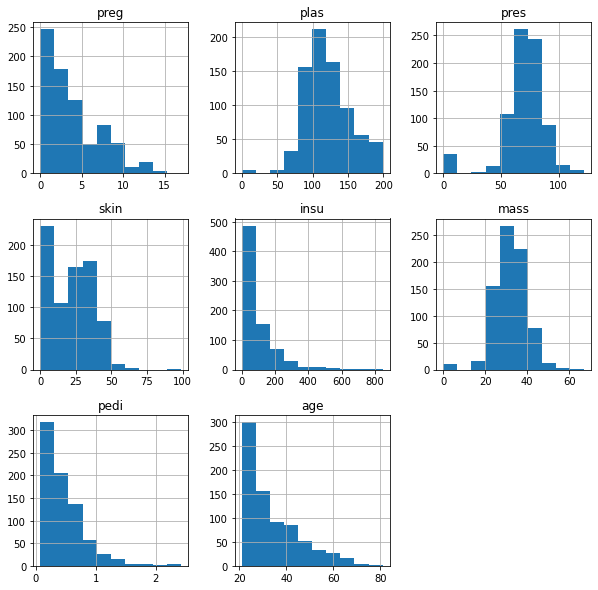

In [19]:
diabetes.hist(figsize=(10,10), layout=(3,3))
plt.show()

In [20]:
pd.set_option('max_columns', 21)
german_credit.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',4.0,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201',b'1'
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',2.0,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'2'
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',3.0,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201',b'1'
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',4.0,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201',b'1'
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',4.0,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201',b'2'
5,b'A14',36.0,b'A32',b'A46',9055.0,b'A65',b'A73',2.0,b'A93',b'A101',4.0,b'A124',35.0,b'A143',b'A153',1.0,b'A172',2.0,b'A192',b'A201',b'1'
6,b'A14',24.0,b'A32',b'A42',2835.0,b'A63',b'A75',3.0,b'A93',b'A101',4.0,b'A122',53.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'1'
7,b'A12',36.0,b'A32',b'A41',6948.0,b'A61',b'A73',2.0,b'A93',b'A101',2.0,b'A123',35.0,b'A143',b'A151',1.0,b'A174',1.0,b'A192',b'A201',b'1'
8,b'A14',12.0,b'A32',b'A43',3059.0,b'A64',b'A74',2.0,b'A91',b'A101',4.0,b'A121',61.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201',b'1'
9,b'A12',30.0,b'A34',b'A40',5234.0,b'A61',b'A71',4.0,b'A94',b'A101',2.0,b'A123',28.0,b'A143',b'A152',2.0,b'A174',1.0,b'A191',b'A201',b'2'


In [21]:
german_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1000 non-null   object 
 1   2       1000 non-null   float64
 2   3       1000 non-null   object 
 3   4       1000 non-null   object 
 4   5       1000 non-null   float64
 5   6       1000 non-null   object 
 6   7       1000 non-null   object 
 7   8       1000 non-null   float64
 8   9       1000 non-null   object 
 9   10      1000 non-null   object 
 10  11      1000 non-null   float64
 11  12      1000 non-null   object 
 12  13      1000 non-null   float64
 13  14      1000 non-null   object 
 14  15      1000 non-null   object 
 15  16      1000 non-null   float64
 16  17      1000 non-null   object 
 17  18      1000 non-null   float64
 18  19      1000 non-null   object 
 19  20      1000 non-null   object 
 20  21      1000 non-null   object 
dtypes: float64(7), object(14)
memory usage

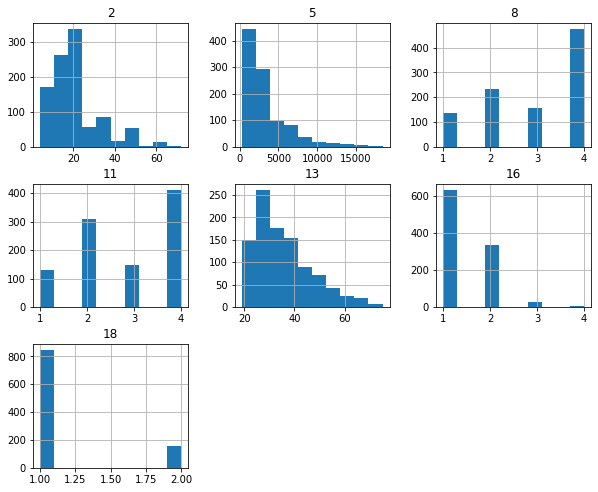

In [22]:
german_credit.hist(layout=(7,3), figsize=(10,20))
plt.show()

# data preprocess

In [24]:
def preprocess_diabetes(data):
  data_copy = data.copy()
  data_copy['class'] = [1 if 'tested_positive' in str(x) else 0 for x in data['class']]
  scaler = MinMaxScaler()
  X = scaler.fit_transform(data_copy)
  return X, scaler


def preprocess_german_credit(data):
  data = data.copy()
  label_encoders = {}
  scaler = MinMaxScaler()
  for column in data.columns:
    if data[column].dtype != float:
      data[column] = [str(x).split('\'')[1] for x in data[column] if data[column].dtype != float]
    if column == '21':
      data[column] = ['0' if x=='1' else '1' for x in data[column]]
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

  X = scaler.fit_transform(data)
  return X, scaler, label_encoders



# Model architecture

In [4]:
def generator(input_size):
  input = Input(input_size)
  X = Dense(256,activation=tf.nn.leaky_relu)(input)
  X = BatchNormalization()(X)
  X = Dense(128, activation=tf.nn.leaky_relu)(X)
  X = BatchNormalization()(X)
  X = Dense(64, activation=tf.nn.leaky_relu)(X)
  X = BatchNormalization()(X)
  X = Dense(32, activation=tf.nn.leaky_relu)(X)
  out = Dense(input_size)(X)
  model = Model(input, out, name='Generator')

  return model

In [5]:
def discriminator(input_size, dropout=0.2):
  input = Input(input_size)
  X = Dense(64,activation='relu')(input)
  X = Dropout(dropout)(X)
  X = Dense(128,activation='relu')(X)
  X = Dropout(dropout)(X)
  X = Dense(512,activation='relu')(X)
  out = Dense(1, activation='sigmoid')(X)
  model = Model(input, out, name='Discriminator')

  return model

In [6]:
# loss functions for the model parts
bce_loss = BinaryCrossentropy()

def discriminator_loss(real, fake):
    real_loss = bce_loss(tf.ones_like(real), real)
    fake_loss = bce_loss(tf.zeros_like(fake), fake)
    total_loss = (real_loss + fake_loss) / 2
    return total_loss

def generator_loss(fake):
    return bce_loss(tf.ones_like(fake), fake)

def discriminator_acc(real, fake):
    real_acc = accuracy_score(tf.ones_like(real), np.around(real))
    fake_acc = accuracy_score(tf.zeros_like(fake), np.around(fake))
    
    return real_acc, fake_acc

In [7]:
# train step - using the generator, generate samples. 
# take the discriminator and apply it on real samples and generated ones. 
# calc loss of both models and update the weights of each model .

def train_step(real_data, generator_model, discriminator_model, batch_size, input_size):
    generator, genr_opt = generator_model
    discriminator, disc_opt = discriminator_model
    
    noise = tf.random.normal([batch_size, input_size])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_samples = generator(noise, training=True)

        real_output = discriminator(real_data, training=True)
        fake_output = discriminator(generated_samples, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
        disc_real_acc, disc_fake_acc = discriminator_acc(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    genr_opt.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    disc_opt.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss, disc_real_acc, disc_fake_acc

In [8]:
# creation and training of a GAN
def create_and_train_GAN(real_data, epochs=450, batch_size=64, buffer_size=10000):
    input_size = real_data.shape[1]
    train_dataset = tf.data.Dataset.from_tensor_slices(real_data).shuffle(buffer_size).batch(batch_size)
    gen_loss_lst, disc_loss_lst, real_acc_lst, fake_acc_lst = [], [], [], []
    
    generator_ = generator(input_size)
    discriminator_ = discriminator(input_size)
    generator_.summary()
    discriminator_.summary()
    
    generator_model = (generator_, Adam(1e-4))
    discriminator_model = (discriminator_, Adam(1e-4))

    for epoch in tqdm(range(epochs)):
        start = time.time()
        gen_loss, disc_loss, real_acc, fake_acc = 0, 0, 0, 0
        num_batchs = 0
        
        for sample_batch in train_dataset:
            curr_gen_loss, curr_disc_loss, curr_real_acc, curr_fake_acc = train_step(sample_batch, generator_model, discriminator_model, batch_size=batch_size, input_size=input_size)
            gen_loss += curr_gen_loss
            disc_loss += curr_disc_loss
            real_acc += curr_real_acc
            fake_acc += curr_fake_acc
            num_batchs += 1
            
        gen_loss_epoch, disc_loss_epoch = gen_loss/num_batchs, disc_loss/num_batchs
        real_acc_epoch, fake_acc_epoch = real_acc/num_batchs, fake_acc/num_batchs
        print('Epoch {}: Generator loss: {:.3f} Discriminator loss: {:.3f}. Accuracy - real: {:.3f}, fake: {:.3f}'.format(epoch, gen_loss_epoch, disc_loss_epoch, real_acc_epoch, fake_acc_epoch))
        gen_loss_lst.append(gen_loss_epoch)
        disc_loss_lst.append(disc_loss_epoch)
        real_acc_lst.append(real_acc_epoch)
        fake_acc_lst.append(fake_acc_epoch) 
        
        
    return generator_, discriminator_, gen_loss_lst, disc_loss_lst, real_acc_lst, fake_acc_lst


In [9]:
# plot train loss and accuracy
def plot_history(gen_loss, disc_loss, real_acc, fake_acc, width=10, height=6):
    history_df = pd.DataFrame(data={'Generator Loss': gen_loss,
                                 'Discriminator Loss': disc_loss,
                                 'Discriminator Real Accuracy': real_acc,
                                 'Discriminator Fake Accuracy': fake_acc}) 
    
    plt.figure(figsize=(width, height))
    plots = plt.plot(history_df)
    plt.xlabel('epochs')
    plt.ylabel('loss/accuracy')
    plt.title('Training loss and accuracy', fontsize=14)
    plt.legend(plots, history_df.columns)
    plt.show()

In [40]:
# compeare generated and original data visualy 
def compare_pcas(original, generated, title):
  pca = PCA(n_components=2)
  original = pca.fit_transform(original)
  generated = pca.fit_transform(generated)

  fig, ax = plt.subplots(figsize=(10, 10))
  plt.scatter(original[:,0],original[:,1], c='blue')
  plt.scatter(generated[:,0],generated[:,1], c='red')
  plt.legend({'original':'blue', 'generated':'red'})
  plt.title(title, fontsize=14)
  plt.show()

In [26]:
# reverse the scaling of the data fo the generated sample
def reverse_scaling_diabetes(scaler, generated_samples):
  scales_back = scaler.inverse_transform(generated_samples)
  generted = pd.DataFrame(scales_back, columns=diabetes.columns)
  generted['class'] = [1 if x > 0.5 else 0 for x in generted['class']]
  return generted


def reverse_scaling_german_credit(scaler, generated_samples, label_endoders=None):
  scales_back = scaler.inverse_transform(generated_samples)
  generted = pd.DataFrame(scales_back, columns=german_credit.columns)

  for le in label_endoders.keys():
    rounded = [int(-1*x) if x < 0 else int(x) for x in np.rint(generted[le])]
    try:
      generted[le] = label_endoders[le].inverse_transform(rounded)
    except ValueError:
      fixed = [min(x, len(label_endoders[le].classes_) -1) for x in rounded]
      generted[le] = label_endoders[le].inverse_transform(fixed)
  return generted

In [12]:
def generate_sample_from_noise(generator, num_fools, noise_dim):
  noise = tf.random.normal([num_fools, noise_dim])
  return generator(noise, training=False).numpy()


In [13]:
def get_samples(num_fools, generator, discriminator, model_name, scaler, noise_dim=5, label_encoders=None):
    generated_samples = generate_sample_from_noise(generator, num_fools, noise_dim)
    if model_name=="diabetes":
      reversed_generated_sample = reverse_scaling_diabetes(scaler, generated_samples)
    else:
      reversed_generated_sample = reverse_scaling_german_credit(scaler, generated_samples, label_endoders=label_encoders)
    
    disc_pred = discriminator.predict(generated_samples)
    reversed_generated_sample['disc_pred'] = disc_pred

    condition = disc_pred >= 0.5
    
    fooled = reversed_generated_sample[condition][-num_fools:]
    fooled_index = fooled.index
    not_fooled = reversed_generated_sample[~condition][-num_fools:]
    not_fooled_index = not_fooled.index
    
    return disc_pred, generated_samples[fooled_index], fooled, generated_samples[not_fooled_index], not_fooled

In [14]:
# plot pie chart of the number of eamples that fooled the disciriminator and the numbers that didn't 
def plot_pie_chart(predictions, title, unknown_threshold=0):
    num_fooled =  len(predictions[predictions > 0.5 + unknown_threshold])
    num_not_fooled = len(predictions) - num_fooled
    
    plt.pie([num_fooled, num_not_fooled], labels = ['Fool', 'Not Fool'], autopct='%1.f%%',
        shadow=True, startangle=90)
    plt.title(title)
    plt.show()
    

In [35]:
# run pipeline of first part
def flow(data, data_name, epochs=450):
  if data_name == 'diabetes':
    X, scaler = preprocess_diabetes(data)
  else:
    X, scaler, label_encoders = preprocess_german_credit(data)

  generator_, discriminator_, gen_loss_lst, disc_loss_lst, real_acc_lst, fake_acc_lst = create_and_train_GAN(X, epochs=epochs)
  plot_history(gen_loss_lst, disc_loss_lst, real_acc_lst, fake_acc_lst)
  generted = generate_sample_from_noise(generator_, X.shape[0], X.shape[1])
  compare_pcas(X[:,:-1], generted[:,:-1], 'Compare PCA of generatead and original sample')

  if data_name == 'diabetes':
    disc_pred, fooled_samples, fooled_samples_df , not_fooled_samples, not_fooled_samples_df = get_samples(num_fools=100, generator=generator_,discriminator=discriminator_, scaler=scaler, noise_dim=X.shape[1], label_encoders=None, model_name="diabetes")

  else:
    disc_pred, fooled_samples, fooled_samples_df , not_fooled_samples, not_fooled_samples_df = get_samples(num_fools=100, generator=generator_, discriminator=discriminator_, noise_dim=X.shape[1], label_encoders=label_encoders, scaler=scaler, model_name="german_credit")
  
  compare_pcas(X[:,:-1], fooled_samples[:,:-1], 'Compare PCA of fooled generated samples and original sample') 
  compare_pcas(X[:,:-1], not_fooled_samples[:,:-1], 'Compare PCA of not fooled generated samples and original sample') 
  plot_pie_chart(disc_pred, 'fooled discriminator', unknown_threshold=0)

  return generator_, discriminator_, fooled_samples_df, not_fooled_samples_df

Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 9)]               0         
                                                                 
 dense_54 (Dense)            (None, 256)               2560      
                                                                 
 batch_normalization_18 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_55 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_19 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_56 (Dense)            (None, 64)                82

  0%|          | 0/250 [00:00<?, ?it/s]

Epoch 0: Generator loss: 0.834 Discriminator loss: 0.646. Accuracy - real: 0.105, fake: 0.987
Epoch 1: Generator loss: 0.921 Discriminator loss: 0.616. Accuracy - real: 0.210, fake: 0.997
Epoch 2: Generator loss: 0.958 Discriminator loss: 0.596. Accuracy - real: 0.556, fake: 0.993
Epoch 3: Generator loss: 0.960 Discriminator loss: 0.583. Accuracy - real: 0.768, fake: 0.969
Epoch 4: Generator loss: 0.939 Discriminator loss: 0.572. Accuracy - real: 0.895, fake: 0.921
Epoch 5: Generator loss: 0.929 Discriminator loss: 0.560. Accuracy - real: 0.908, fake: 0.880
Epoch 6: Generator loss: 0.928 Discriminator loss: 0.551. Accuracy - real: 0.910, fake: 0.829
Epoch 7: Generator loss: 0.923 Discriminator loss: 0.550. Accuracy - real: 0.909, fake: 0.773
Epoch 8: Generator loss: 0.951 Discriminator loss: 0.542. Accuracy - real: 0.892, fake: 0.805
Epoch 9: Generator loss: 0.989 Discriminator loss: 0.538. Accuracy - real: 0.858, fake: 0.822
Epoch 10: Generator loss: 1.010 Discriminator loss: 0.534. A

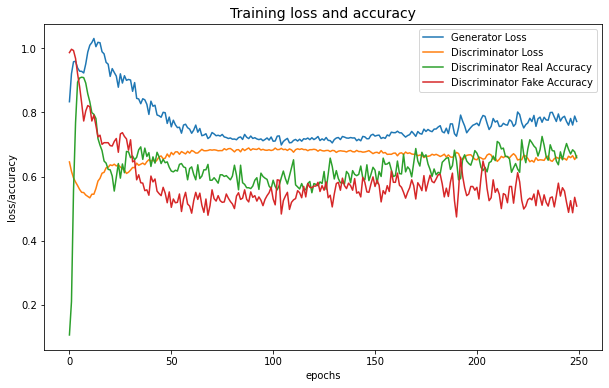

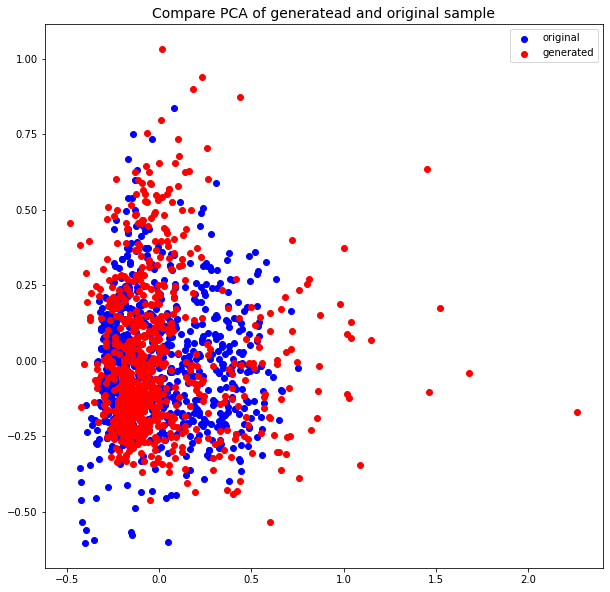

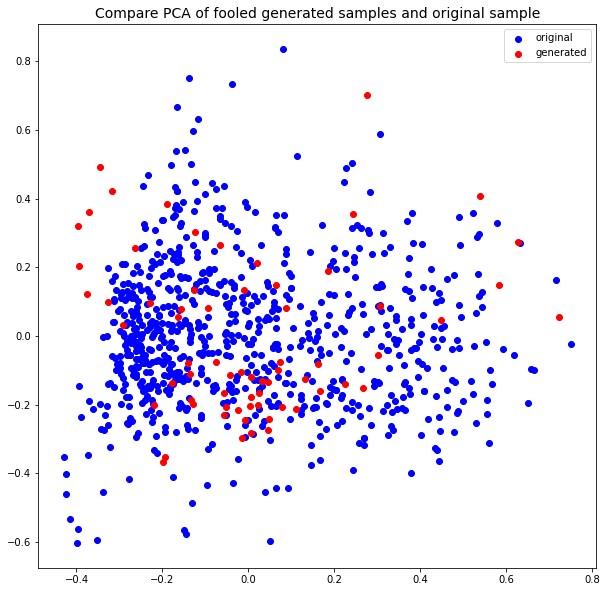

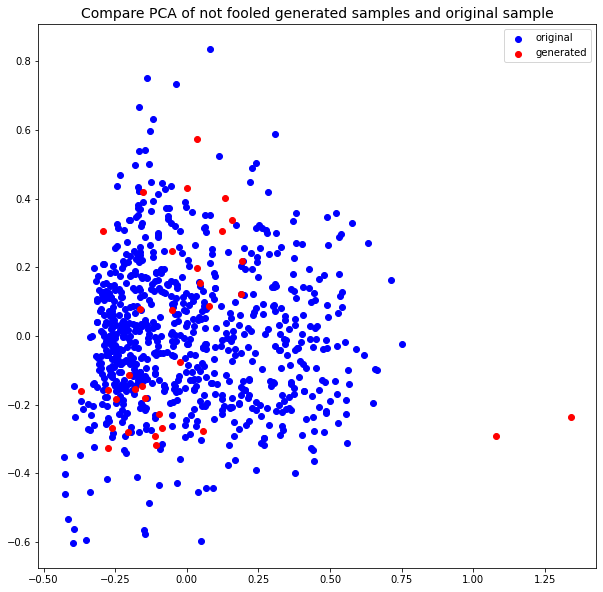

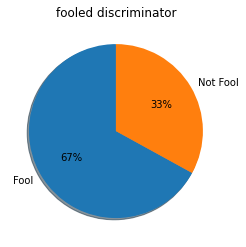

In [41]:
generator_diabetes, discriminator_diabetes, fooled_samples_df_diabetes, not_fooled_samples_df_diabetes = flow(diabetes, 'diabetes', 250)

In [37]:
fooled_samples_df_diabetes

,preg,plas,pres,skin,insu,mass,pedi,age,class,disc_pred
0,10.681387,127.236130,81.358795,20.090235,-22.716509,31.234249,0.280346,52.269047,0,0.568550
1,6.730704,77.755920,68.579910,8.147600,-15.646030,26.966961,0.242242,34.571884,0,0.565561
4,9.480645,114.728638,78.150055,22.443827,26.162586,36.945728,0.425324,25.755146,1,0.586105
5,1.161134,120.284500,88.714493,40.766239,107.965218,58.005264,1.007045,16.115887,0,0.584314
6,2.117890,93.850769,51.969650,21.101570,131.929199,25.386208,0.252070,22.729452,0,0.527349
...,...,...,...,...,...,...,...,...,...,...
93,11.924850,128.104996,114.089523,17.591732,-7.274595,33.164734,0.235017,59.843853,0,0.542390
94,4.015940,93.064438,101.585533,7.994150,-6.783516,29.153801,0.421438,36.727371,0,0.575249
95,5.638880,91.115883,59.275555,28.872055,134.783249,25.175053,0.329968,31.972000,0,0.525495
96,5.889933,137.680588,75.530968,22.862185,26.950876,30.214382,0.196639,42.218815,1,0.545636


In [38]:
not_fooled_samples_df_diabetes

,preg,plas,pres,skin,insu,mass,pedi,age,class,disc_pred
2,2.973588,97.836624,60.830891,32.453697,70.012100,31.131964,0.291330,22.608315,1,0.341797
3,6.982035,68.650833,19.863064,-7.718239,-123.823288,27.223410,0.453342,43.532585,0,0.317215
8,3.227352,72.171837,47.052799,40.001289,93.690865,26.492846,0.434963,17.117107,0,0.493713
11,3.330611,84.821152,61.337147,26.213797,-15.373146,22.097445,0.458688,25.822393,1,0.368579
17,4.418523,74.839157,45.686047,3.972663,-15.192578,12.930507,1.035251,29.288536,0,0.376376
23,12.299655,77.631409,82.305824,18.612576,44.949406,32.914261,0.259932,55.972496,0,0.462448
27,5.851851,87.565987,49.672131,17.827156,-24.016897,24.584028,0.404530,29.257362,0,0.247750
33,2.109506,127.800529,50.033981,-5.148126,42.564774,23.394566,0.864445,24.337769,0,0.495327
41,2.280150,93.066788,38.724895,7.671420,-30.825083,19.004581,1.183693,16.459177,1,0.379245
56,4.599531,128.913788,56.246029,20.388792,219.818909,43.030754,0.135866,28.586727,0,0.329494


Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 21)]              0         
                                                                 
 dense_63 (Dense)            (None, 256)               5632      
                                                                 
 batch_normalization_21 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_64 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_22 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_65 (Dense)            (None, 64)                82

  0%|          | 0/250 [00:00<?, ?it/s]

Epoch 0: Generator loss: 0.683 Discriminator loss: 0.664. Accuracy - real: 0.960, fake: 0.426
Epoch 1: Generator loss: 0.868 Discriminator loss: 0.553. Accuracy - real: 0.991, fake: 0.919
Epoch 2: Generator loss: 1.017 Discriminator loss: 0.463. Accuracy - real: 0.996, fake: 0.954
Epoch 3: Generator loss: 1.132 Discriminator loss: 0.397. Accuracy - real: 0.996, fake: 0.929
Epoch 4: Generator loss: 1.249 Discriminator loss: 0.341. Accuracy - real: 1.000, fake: 0.934
Epoch 5: Generator loss: 1.371 Discriminator loss: 0.315. Accuracy - real: 0.998, fake: 0.900
Epoch 6: Generator loss: 1.526 Discriminator loss: 0.302. Accuracy - real: 0.993, fake: 0.888
Epoch 7: Generator loss: 1.675 Discriminator loss: 0.284. Accuracy - real: 0.986, fake: 0.917
Epoch 8: Generator loss: 1.809 Discriminator loss: 0.282. Accuracy - real: 0.970, fake: 0.915
Epoch 9: Generator loss: 1.879 Discriminator loss: 0.259. Accuracy - real: 0.959, fake: 0.926
Epoch 10: Generator loss: 1.958 Discriminator loss: 0.255. A

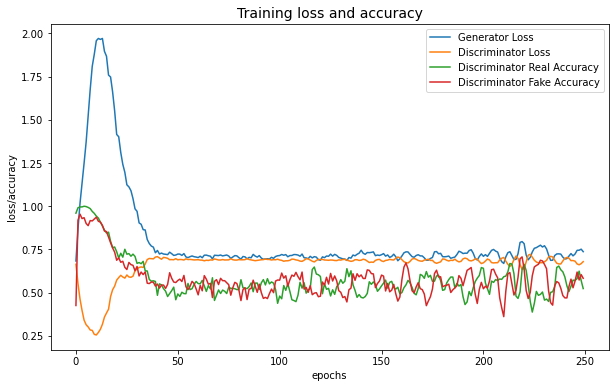

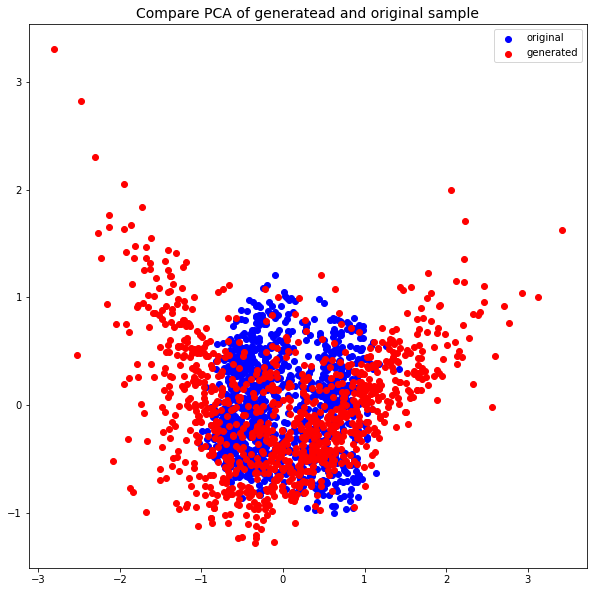

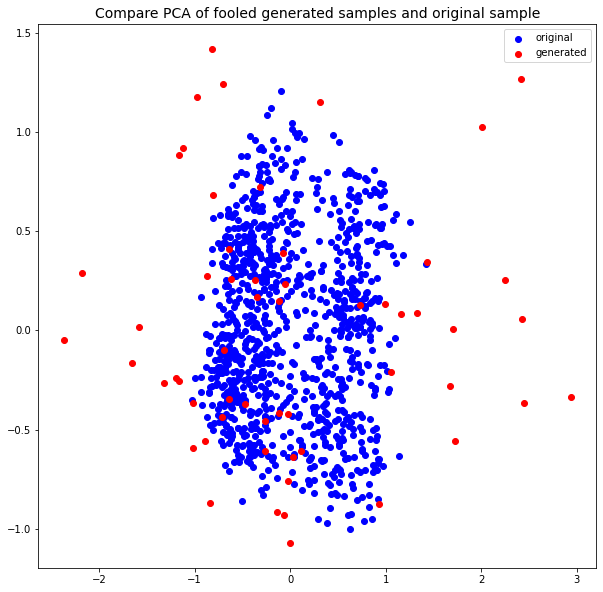

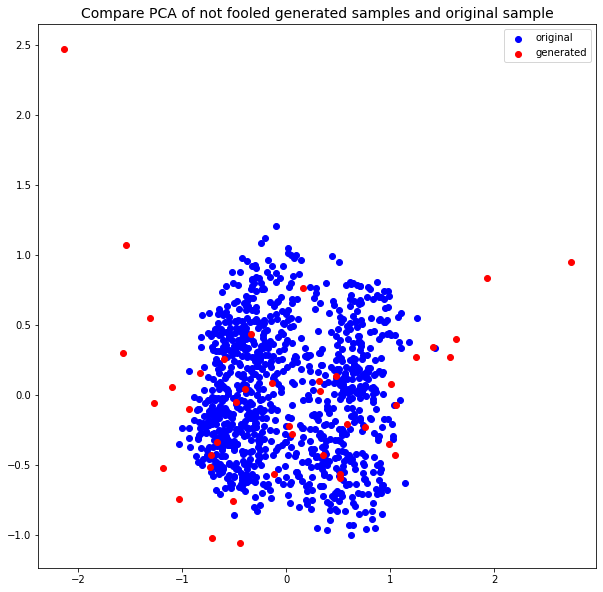

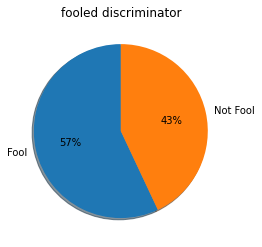

In [42]:
generator_german_credit, discriminator_german_credit, fooled_samples_df, not_fooled_samples_df = flow(german_credit, 'german_credit', 250)

In [43]:
pd.set_option('max_columns', 22)
fooled_samples_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,disc_pred
2,A13,14.0,A33,A46,3079.0,A61,A72,1.0,A94,A101,3.0,A122,23.0,A143,A151,2.0,A172,1.0,A191,A201,0,0.587319
4,A12,11.0,A31,A48,590.0,A63,A75,4.0,A93,A101,4.0,A121,28.0,A143,A153,1.0,A172,1.0,A191,A201,1,0.516651
5,A12,20.0,A32,A41,1934.0,A64,A74,4.0,A93,A101,4.0,A124,42.0,A142,A152,1.0,A173,2.0,A192,A201,0,0.542075
6,A13,40.0,A32,A43,3660.0,A63,A74,4.0,A94,A101,4.0,A124,34.0,A142,A153,1.0,A173,1.0,A192,A201,1,0.543413
8,A13,72.0,A34,A49,1169.0,A63,A72,2.0,A94,A102,3.0,A123,24.0,A143,A153,3.0,A172,1.0,A192,A201,1,0.686263
9,A12,22.0,A33,A410,1893.0,A63,A71,2.0,A93,A102,2.0,A123,55.0,A142,A153,2.0,A172,1.0,A191,A201,1,0.577049
10,A12,20.0,A32,A40,2828.0,A63,A74,3.0,A93,A101,4.0,A124,32.0,A142,A152,2.0,A173,1.0,A192,A201,0,0.559446
11,A12,12.0,A32,A41,1922.0,A63,A74,3.0,A92,A101,3.0,A122,30.0,A142,A151,1.0,A172,1.0,A191,A201,0,0.504686
13,A12,9.0,A33,A48,2133.0,A62,A74,1.0,A93,A101,2.0,A124,32.0,A143,A151,1.0,A172,1.0,A191,A201,0,0.520595
14,A11,12.0,A34,A410,2647.0,A62,A75,2.0,A92,A102,4.0,A124,27.0,A143,A152,3.0,A173,1.0,A191,A201,0,0.510752


In [44]:
not_fooled_samples_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,disc_pred
0,A14,10.0,A32,A40,2238.0,A63,A73,1.0,A92,A101,2.0,A122,30.0,A143,A152,1.0,A173,1.0,A191,A201,0,0.498389
1,A14,26.0,A33,A41,1882.0,A65,A75,4.0,A94,A101,4.0,A124,32.0,A142,A152,1.0,A174,2.0,A192,A201,1,0.492212
3,A12,6.0,A33,A42,2279.0,A63,A74,3.0,A92,A101,2.0,A122,22.0,A143,A152,2.0,A173,1.0,A191,A201,0,0.475797
7,A13,7.0,A34,A43,1913.0,A62,A75,2.0,A92,A101,2.0,A124,29.0,A143,A151,1.0,A173,1.0,A191,A201,0,0.489265
12,A14,45.0,A33,A410,3622.0,A64,A75,4.0,A93,A102,4.0,A124,48.0,A142,A153,1.0,A174,1.0,A192,A201,1,0.477241
16,A14,15.0,A33,A40,1908.0,A61,A74,2.0,A92,A101,3.0,A124,27.0,A143,A153,2.0,A173,1.0,A191,A201,0,0.477569
19,A11,10.0,A34,A45,2359.0,A62,A75,2.0,A93,A101,3.0,A124,20.0,A143,A152,2.0,A173,1.0,A191,A201,0,0.493915
21,A14,14.0,A33,A43,9857.0,A63,A75,3.0,A93,A102,2.0,A124,29.0,A143,A152,1.0,A173,1.0,A191,A201,0,0.494358
22,A12,7.0,A32,A43,2273.0,A62,A74,1.0,A92,A101,3.0,A124,29.0,A143,A151,1.0,A172,1.0,A191,A201,0,0.487322
23,A14,26.0,A33,A410,1961.0,A65,A74,4.0,A92,A101,3.0,A124,35.0,A142,A152,1.0,A174,2.0,A192,A201,1,0.481096


# Random forest training

In [ ]:
diabetes_pre, _ = preprocess_diabetes(diabetes)
german_credit_pre, _, _ = preprocess_german_credit(german_credit)

In [ ]:
diabetes_x_train, diabetes_x_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_pre[:,:-1], diabetes_pre[:,-1], test_size=0.3, random_state=SEED)
german_credit_x_train, german_credit_x_test, german_credit_y_train, german_credit_y_test = train_test_split(german_credit_pre[:,:-1], german_credit_pre[:,-1], test_size=0.3, random_state=SEED)

In [ ]:
def rf_evaluate(rf, x_test, y_test=None):
    if y_test is not None:
        # accuracy
        print(f'Accuracy: {rf.score(x_test, y_test)*100:.2f}%')
        # classification report
        preds = rf.predict(x_test)
        print(classification_report(y_test, preds))

        # confusion matrix
        matrix = confusion_matrix(y_test, preds)
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
        plt.figure(figsize=(8,4))
        sns.set(font_scale=1.4)
        sns.heatmap(matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.Blues, linewidths=0.2)
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.title('Confusion Matrix for Random Forest Model')
        plt.show()

    confid_vals = rf.predict_proba(x_test)[:,1]
    print(f'Maximum Confidence: {np.max(confid_vals):.2f}')
    print(f'Minimum Confidence: {np.min(confid_vals):.2f}')
    print(f'Average Confidence: {np.mean(confid_vals):.2f}')
    print(f'Median Confidence: {np.median(confid_vals):.2f}')
    
    # RF confidence in predictions
    plt.title("Random Forest confidence in predictions")
    plt.hist(confid_vals)
    plt.xlabel('Confidence Score')
    plt.ylabel('Amount')
    plt.show()


def fit_eval_rf_model(x_train, y_train, x_test, y_test=None):
  rf = RandomForestClassifier(n_jobs=-1)
  rf.fit(x_train, y_train)
  rf_evaluate(rf, x_test, y_test)
  return rf


Accuracy: 77.06%
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84       153
         1.0       0.73      0.51      0.60        78

    accuracy                           0.77       231
   macro avg       0.76      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



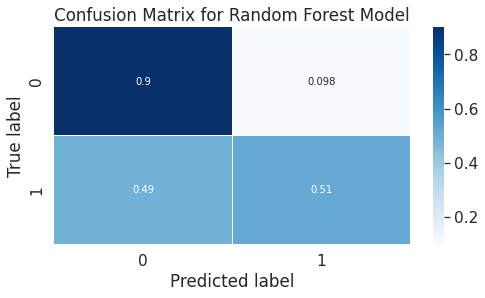

Maximum Confidence: 0.93
Minimum Confidence: 0.00
Average Confidence: 0.32
Median Confidence: 0.26


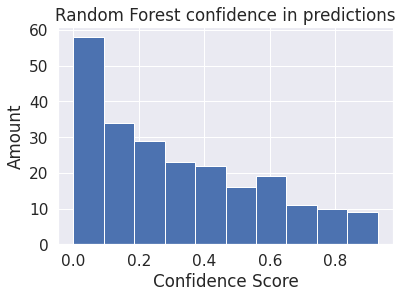

In [ ]:
diabetes_rf = fit_eval_rf_model(diabetes_x_train, diabetes_y_train, diabetes_x_test, diabetes_y_test)

Accuracy: 77.33%
              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85       209
         1.0       0.69      0.46      0.55        91

    accuracy                           0.77       300
   macro avg       0.74      0.69      0.70       300
weighted avg       0.76      0.77      0.76       300



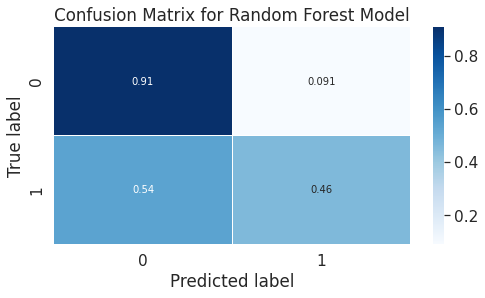

Maximum Confidence: 0.81
Minimum Confidence: 0.02
Average Confidence: 0.31
Median Confidence: 0.28


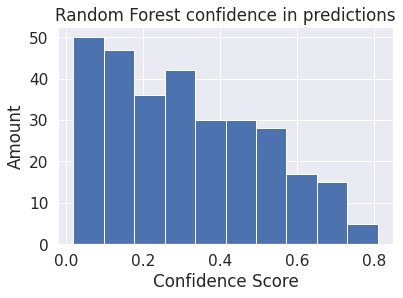

In [ ]:
german_credit_rf = fit_eval_rf_model(german_credit_x_train, german_credit_y_train, german_credit_x_test, german_credit_y_test)

# Twist GAN Architecture

In [ ]:
def generator_model_twist(noise_shape, output_shape):
    input_noise = Input(shape=noise_shape)
    input_c = Input(shape=(1,))
    
    X = Concatenate()([input_noise, input_c])
    X = Dense(512, activation=tf.nn.leaky_relu)(X)
    X = Concatenate()([X, input_c])
    X = BatchNormalization()(X)
    X = Dense(256, activation=tf.nn.leaky_relu)(X)
    X = Concatenate()([X, input_c])
    X = BatchNormalization()(X)
    X = Dense(128, activation=tf.nn.leaky_relu)(X)
    X = Concatenate()([X, input_c])
    X = BatchNormalization()(X)
    X = Dense(64, activation=tf.nn.leaky_relu)(X)
    X = Concatenate()([X, input_c])
    X = BatchNormalization()(X)
    X = Dense(32, activation=tf.nn.leaky_relu)(X)
    X = Concatenate()([X, input_c])
    X = BatchNormalization()(X)
    X = Dense(16, activation=tf.nn.leaky_relu)(X)
    
    out = Dense(output_shape, activation='sigmoid')(X)
    model = Model([input_noise, input_c], out)
    
    return model

In [ ]:
def discriminator_model_twist(input_shape):
    input_sample = Input(shape=input_shape)
    input_confid = Input(shape=(1,))
    
    X = Concatenate()([input_sample, input_confid])
    X = BatchNormalization()(X)
    X = Dense(32, activation=tf.nn.relu)(X)
    X = Dense(16, activation=tf.nn.relu)(X)
    X = Concatenate()([X, input_confid])
    
    out = Dense(1, activation='sigmoid')(X)
    model = Model([input_sample, input_confid], out)
    
    return model

# Twist GAN training

In [ ]:

def train_step_twist(generator_model, discriminator_model, rf, batch_size, noise_dim):
    generator, genr_opt = generator_model
    discriminator, disc_opt = discriminator_model
    
    z = tf.random.normal([batch_size, noise_dim])
    c = tf.random.uniform([batch_size, 1], minval=0, maxval=1)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_samples = generator([z, c], training=True)
        
        y = rf.predict_proba(generated_samples)[:,1]

        real_output = discriminator([generated_samples, y], training=True)
        fake_output = discriminator([generated_samples, c], training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
        disc_real_acc, disc_fake_acc = discriminator_acc(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    genr_opt.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    disc_opt.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss, disc_real_acc, disc_fake_acc 


def create_and_train_GAN_twist( real_data, rf, epochs=450, steps=15, noise_dim=5, batch_size=64, dataset_type='diab'):
    input_size = real_data.shape[1]
    gen_loss_lst, disc_loss_lst, real_acc_lst, fake_acc_lst = [], [], [], []
    
    generator = generator_model_twist(noise_dim, input_size)
    discriminator = discriminator_model_twist(input_size)
    generator.summary()
    discriminator.summary() 
    
    generator_model = (generator, Adam(1e-4))
    discriminator_model = (discriminator, Adam(1e-4))
    
    for epoch in tqdm(range(epochs)):
        start = time.time()
        gen_loss, disc_loss, real_acc, fake_acc = 0, 0, 0, 0
        num_batchs = 0
        
        for _ in range(steps):
            num_batchs += 1
            curr_gen_loss, curr_disc_loss, curr_real_acc, curr_fake_acc = train_step_twist(generator_model, discriminator_model, rf, batch_size=batch_size, noise_dim=noise_dim)
            gen_loss += curr_gen_loss
            disc_loss += curr_disc_loss
            real_acc += curr_real_acc
            fake_acc += curr_fake_acc
            
        gen_loss_epoch, disc_loss_epoch = gen_loss/num_batchs, disc_loss/num_batchs
        real_acc_epoch, fake_acc_epoch = real_acc/num_batchs, fake_acc/num_batchs
        print('Epoch {}: Generator loss: {:.3f} Discriminator loss: {:.3f}. Accuracy - real: {:.3f}, fake: {:.3f}'.format(epoch, gen_loss_epoch, disc_loss_epoch, real_acc_epoch, fake_acc_epoch))
        gen_loss_lst.append(gen_loss_epoch)
        disc_loss_lst.append(disc_loss_epoch)
        real_acc_lst.append(real_acc_epoch)
        fake_acc_lst.append(fake_acc_epoch) 
        
    return generator, discriminator, gen_loss_lst, disc_loss_lst, real_acc_lst, fake_acc_lst


In [ ]:
def generate_samples_twist(generator, discriminator, num_samples, noise_dim=5):
    noise = tf.random.normal([num_samples, noise_dim])
    confd = tf.random.uniform([num_samples, 1], minval=0, maxval=1)
    
    generated_samples = generator([noise, confd], training=False)
    disc_pred = discriminator([generated_samples, confd], training=False)
    
    return generated_samples, confd, disc_pred

In [ ]:
def flow_with_twist(data, data_name, rf_model):
  if data_name == 'diabetes':
    X, scaler = preprocess_diabetes(data)
  else:
    X, label_encoders, scaler = preprocess_german_credit(data)

  generator, discriminator, gen_loss_lst, disc_loss_lst, real_acc_lst, fake_acc_lst = create_and_train_GAN_twist(X[:,:-1], rf_model, epochs=450, steps=15, noise_dim=5, batch_size=64, dataset_type=data_name)
  plot_history(gen_loss_lst, disc_loss_lst, real_acc_lst, fake_acc_lst)

  generated_samples, confd, disc_pred = generate_samples_twist(generator, discriminator, 1000)
  compare_pcas(X[:,:-1], generated_samples)

  return generated_samples, confd, disc_pred


# Generating samples

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 5)]          0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 6)            0           ['input_15[0][0]',               
                                                                  'input_16[0][0]']               
                                                                                                  
 dense_63 (Dense)               (None, 512)          3584        ['concatenate[0][0]']     

  0%|          | 0/450 [00:00<?, ?it/s]

Epoch 0: Generator loss: 0.781 Discriminator loss: 0.698. Accuracy - real: 0.432, fake: 0.659
Epoch 1: Generator loss: 0.715 Discriminator loss: 0.688. Accuracy - real: 0.537, fake: 0.566
Epoch 2: Generator loss: 0.702 Discriminator loss: 0.689. Accuracy - real: 0.585, fake: 0.524
Epoch 3: Generator loss: 0.696 Discriminator loss: 0.695. Accuracy - real: 0.580, fake: 0.475
Epoch 4: Generator loss: 0.692 Discriminator loss: 0.702. Accuracy - real: 0.573, fake: 0.460
Epoch 5: Generator loss: 0.690 Discriminator loss: 0.704. Accuracy - real: 0.559, fake: 0.503
Epoch 6: Generator loss: 0.681 Discriminator loss: 0.706. Accuracy - real: 0.582, fake: 0.446
Epoch 7: Generator loss: 0.683 Discriminator loss: 0.706. Accuracy - real: 0.553, fake: 0.480
Epoch 8: Generator loss: 0.681 Discriminator loss: 0.713. Accuracy - real: 0.532, fake: 0.471
Epoch 9: Generator loss: 0.679 Discriminator loss: 0.710. Accuracy - real: 0.530, fake: 0.471
Epoch 10: Generator loss: 0.670 Discriminator loss: 0.715. A

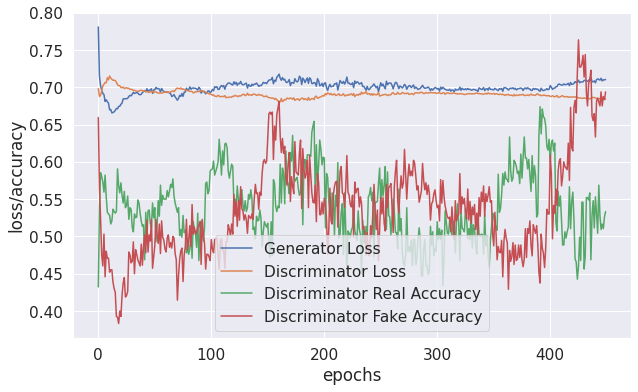

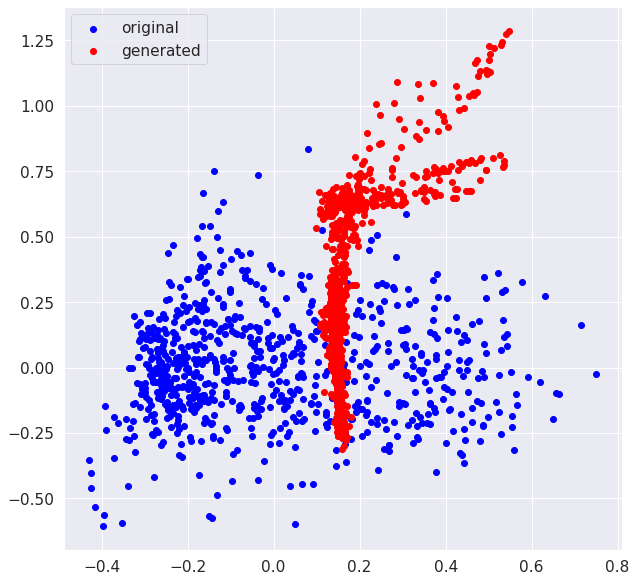

In [ ]:
generated_samples_diab, confd_diab, disc_pred_diab = flow_with_twist(diabetes, 'diabetes', diabetes_rf)

Maximum Confidence: 0.69
Minimum Confidence: 0.13
Average Confidence: 0.41
Median Confidence: 0.44


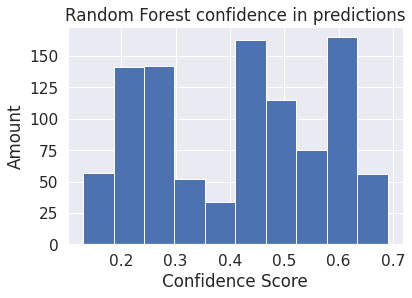

In [ ]:
rf_evaluate(diabetes_rf, generated_samples_diab)

In [ ]:
np.array(confd_diab).reshape((1000,)).shape

(1000,)

In [ ]:
from scipy import stats

preds_diabetes = diabetes_rf.predict_proba(generated_samples_diab)[:,1]
print("pearson correlation between the uniformly sampled confidence scores and prediction",stats.pearsonr(np.array(confd_diab).reshape((1000,)), preds_diabetes))
print(f'Class prediction accuracy by confidence {accuracy_score(np.around(preds_diabetes), np.around(confd_diab)) * 100:.2f}%')

pearson correlation between the uniformly sampled confidence scores and prediction (0.9308842453325207, 0.0)
Class prediction accuracy by confidence 81.50%


Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 5)]          0           []                               
                                                                                                  
 input_24 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 concatenate_16 (Concatenate)   (None, 6)            0           ['input_23[0][0]',               
                                                                  'input_24[0][0]']               
                                                                                                  
 dense_83 (Dense)               (None, 512)          3584        ['concatenate_16[0][0]']  

  0%|          | 0/450 [00:00<?, ?it/s]

Epoch 0: Generator loss: 0.337 Discriminator loss: 0.857. Accuracy - real: 0.990, fake: 0.017
Epoch 1: Generator loss: 0.299 Discriminator loss: 0.883. Accuracy - real: 0.993, fake: 0.008
Epoch 2: Generator loss: 0.293 Discriminator loss: 0.881. Accuracy - real: 0.993, fake: 0.001
Epoch 3: Generator loss: 0.293 Discriminator loss: 0.876. Accuracy - real: 0.994, fake: 0.001
Epoch 4: Generator loss: 0.302 Discriminator loss: 0.868. Accuracy - real: 0.994, fake: 0.005
Epoch 5: Generator loss: 0.312 Discriminator loss: 0.855. Accuracy - real: 0.995, fake: 0.005
Epoch 6: Generator loss: 0.323 Discriminator loss: 0.843. Accuracy - real: 0.990, fake: 0.006
Epoch 7: Generator loss: 0.331 Discriminator loss: 0.832. Accuracy - real: 0.995, fake: 0.003
Epoch 8: Generator loss: 0.343 Discriminator loss: 0.825. Accuracy - real: 0.988, fake: 0.008
Epoch 9: Generator loss: 0.348 Discriminator loss: 0.821. Accuracy - real: 0.992, fake: 0.008
Epoch 10: Generator loss: 0.360 Discriminator loss: 0.810. A

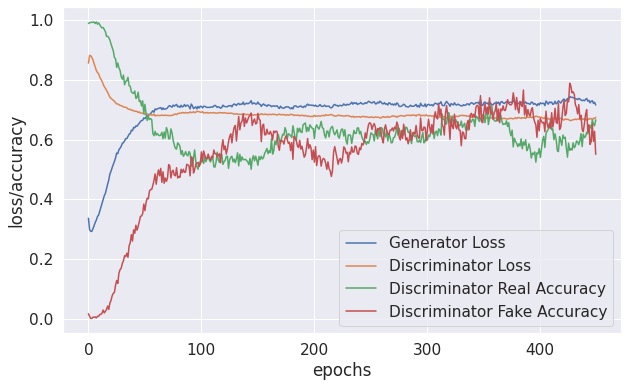

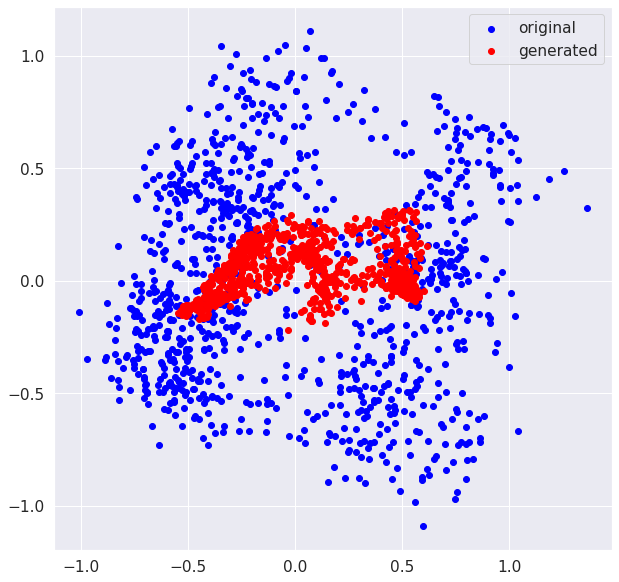

In [ ]:
generated_samples_german_credit, confd_german_credit, disc_pred_german_credit  = flow_with_twist(german_credit, 'german_credit', german_credit_rf)

Maximum Confidence: 0.59
Minimum Confidence: 0.18
Average Confidence: 0.39
Median Confidence: 0.36


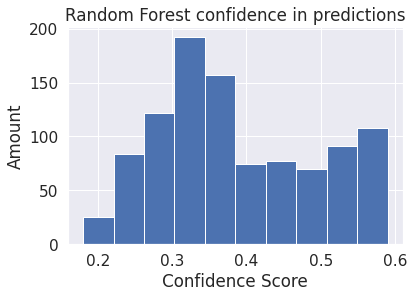

In [ ]:
rf_evaluate(german_credit_rf, generated_samples_german_credit)

In [ ]:
preds_german_credit = german_credit_rf.predict_proba(generated_samples_german_credit)[:,1]
print("pearson correlation between the uniformly sampled confidence scores and prediction",stats.pearsonr(np.array(confd_german_credit).reshape((1000,)), preds_german_credit))
print(f'Class prediction accuracy by confidence {accuracy_score(np.around(preds_german_credit), np.around(confd_german_credit)) * 100:.2f}%')

pearson correlation between the uniformly sampled confidence scores and prediction (0.7980506968722724, 9.164098706954867e-222)
Class prediction accuracy by confidence 70.60%
